# Author : Sharukh Mulani

## Problem Statement

Exploratory Data Analysis on dataset ‘Global Terrorism’.

As a security/defense analyst, try to find out the hot zone of terrorism.

Derive all security issues and insights. 

## Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('globalterrorismdb.csv', encoding= 'ISO-8859-1')
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
df.shape

(181691, 135)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
col_names = []
for i in df.columns:
    col_names.append(i)

## Data Processing

In [7]:
col_names

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [8]:
# Rename some columns which we are going to use for analysis.

df = df.rename(columns = {'iyear':'Year','imonth':'Month', 'iday':'Day','country_txt':'Country','region_txt':'Region',
                          'provstate':'State','city':'City','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type',
                          'natlty1_txt':'Nationality_of_Vic','nkill' : 'nKilled','nwound' : 'nWounded',
                          'ishostkid' : 'Victim_Kidnapped','targsubtype1_txt':'Target_Subtype','gname':'Gang_Name',
                          'weaptype1_txt':'Weapon_type'})

In [9]:
#Add column ncasualties (Number of Dead/Injured people) by adding Nkill and Nwound
df['nCasualties'] = df['nKilled'] + df['nWounded']

In [10]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,nCasualties
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN


In [11]:
# Now take only those columns which are required for analysis in the dataset.

df = df[['Year','Month','Day','Country','Region','State','City','Attack_Type','Target_Type','Target_Subtype',
         'Nationality_of_Vic','Gang_Name','nCasualties','Victim_Kidnapped','Weapon_type']]
df.head()

,Year,Month,Day,Country,Region,State,City,Attack_Type,Target_Type,Target_Subtype,Nationality_of_Vic,Gang_Name,nCasualties,Victim_Kidnapped,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,1.0,0.0,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,0.0,1.0,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,1.0,0.0,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,Incendiary


In [12]:
# Check null values
df.isnull().sum()

Year                      0
Month                     0
Day                       0
Country                   0
Region                    0
State                   421
City                    434
Attack_Type               0
Target_Type               0
Target_Subtype        10373
Nationality_of_Vic     1559
Gang_Name                 0
nCasualties           16874
Victim_Kidnapped        178
Weapon_type               0
dtype: int64

In [13]:
#Fill NaN values in Target_subtype column as Others
df['Target_Subtype'] = df['Target_Subtype'].fillna('others')

In [14]:
#Fill NaN values in State column as Unknown
df['State'] = df['State'].fillna('Unknown')

In [15]:
#Fill NaN values in State column as Unknown
df['City'] = df['City'].fillna('Unknown')

In [16]:
#Fill NaN values in natinality of victim column as Unknown
df['Nationality_of_Vic'].fillna('Unknown', inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                181691 non-null  int64  
 1   Month               181691 non-null  int64  
 2   Day                 181691 non-null  int64  
 3   Country             181691 non-null  object 
 4   Region              181691 non-null  object 
 5   State               181691 non-null  object 
 6   City                181691 non-null  object 
 7   Attack_Type         181691 non-null  object 
 8   Target_Type         181691 non-null  object 
 9   Target_Subtype      181691 non-null  object 
 10  Nationality_of_Vic  181691 non-null  object 
 11  Gang_Name           181691 non-null  object 
 12  nCasualties         164817 non-null  float64
 13  Victim_Kidnapped    181513 non-null  float64
 14  Weapon_type         181691 non-null  object 
dtypes: float64(2), int64(3), object(10

In [18]:
df['Weapon_type'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [19]:
# Make simple reading 
df.replace({'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)': 'Vehicle'},inplace = True)

## Exploratory Data Analysis

In [20]:
# This is our final dataset
df.head()

,Year,Month,Day,Country,Region,State,City,Attack_Type,Target_Type,Target_Subtype,Nationality_of_Vic,Gang_Name,nCasualties,Victim_Kidnapped,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,1.0,0.0,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,0.0,1.0,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,1.0,0.0,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,Incendiary


In [21]:
df.shape

(181691, 15)

In [22]:
# Check were affected countries.
df['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [23]:
# Check number of countries were noted in the data
len(df['Country'].unique())

205

In [24]:
# check were affected regions
df['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [25]:
# Check number of regions were noted in the data
len(df['Region'].unique())

12

In [26]:
# check were affected regions
df['State'].unique()

array(['Unknown', 'Federal', 'Tarlac', ..., 'Carlow', 'Western Lakes',
       'Vidzeme'], dtype=object)

In [27]:
# Check number of states were noted in the data
len(df['State'].unique())

2855

In [28]:
# check attack type used by terrorist
df['Attack_Type'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [29]:
# check target type type used by terrorist
df['Target_Type'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [30]:
# check target subtype type used by terrorist
df['Target_Subtype'].unique()

array(['Named Civilian',
       'Diplomatic Personnel (outside of embassy, consulate)',
       'Radio Journalist/Staff/Facility', 'Embassy/Consulate',
       'Police Building (headquarters, station, school)',
       'Police Security Forces/Officers', 'Electricity',
       'Military Recruiting Station/Academy',
       'Government Building/Facility/Office',
       'Military Barracks/Base/Headquarters/Checkpost',
       'Aircraft (not at an airport)', 'Retail/Grocery/Bakery', 'others',
       'Military Personnel (soldiers, troops, officers, forces)',
       'School/University/Educational Building',
       'Multinational Corporation', 'Party Office/Facility',
       'House/Apartment/Residence', 'Race/Ethnicity Identified',
       'Judge/Attorney/Court',
       'Police Patrol (including vehicles and convoys)',
       'Place of Worship', 'Vehicles/Transportation',
       'Bus (excluding tourists)',
       'Politician or Political Party Movement/Meeting/Rally',
       'Hotel/Resort', 'Airport

In [31]:
# check the country of affected citizens
df['Nationality_of_Vic'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', 'Unknown',
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 

In [32]:
# check the number contries of affected citizens
len(df['Nationality_of_Vic'].unique())

216

In [33]:
# check names of terrorist organizations 
df['Gang_Name'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [34]:
# number of terrorist organizations
len(df['Gang_Name'].unique())

3537

In [35]:
# weapons type used by terrorist
df['Weapon_type'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment', 'Vehicle', 'Fake Weapons',
       'Radiological', 'Other', 'Biological'], dtype=object)

In [36]:
# The top affected countries.
df['Country'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

In [37]:
# The top affected regions.
df['Region'].value_counts().head()

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64

In [38]:
# The top affected statess.
df['State'].value_counts().head()

Baghdad             7645
Unknown             4711
Northern Ireland    4498
Balochistan         3710
Saladin             3411
Name: State, dtype: int64

In [39]:
# The top affected cities.
df['City'].value_counts().head()

Unknown    10209
Baghdad     7589
Karachi     2652
Lima        2359
Mosul       2265
Name: City, dtype: int64

In [40]:
# The top attack modes used by terrorists.
df['Attack_Type'].value_counts().head()

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: Attack_Type, dtype: int64

In [41]:
# The top Targets.
df['Target_Type'].value_counts().head()

Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: Target_Type, dtype: int64

In [42]:
# The top Targeted groups
df['Target_Subtype'].value_counts().head()

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
others                                                     10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Name: Target_Subtype, dtype: int64

In [43]:
# The top contries of affected citizens
df['Nationality_of_Vic'].value_counts().head()

Iraq           24113
Pakistan       13900
India          12098
Afghanistan    10931
Colombia        7922
Name: Nationality_of_Vic, dtype: int64

In [44]:
# The top terrorist organizations
df['Gang_Name'].value_counts().head()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Gang_Name, dtype: int64

In [45]:
# The top weapons used by terrorists.
df['Weapon_type'].value_counts().head()

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: Weapon_type, dtype: int64

In [46]:
# Number of casualties happen
df['nCasualties'].sum()

872892.0

In [47]:
# Number of casualties happen
df['Victim_Kidnapped'].sum()

10719.0

## Data Visualization

Text(0.5, 1.0, 'Attacks per Year')

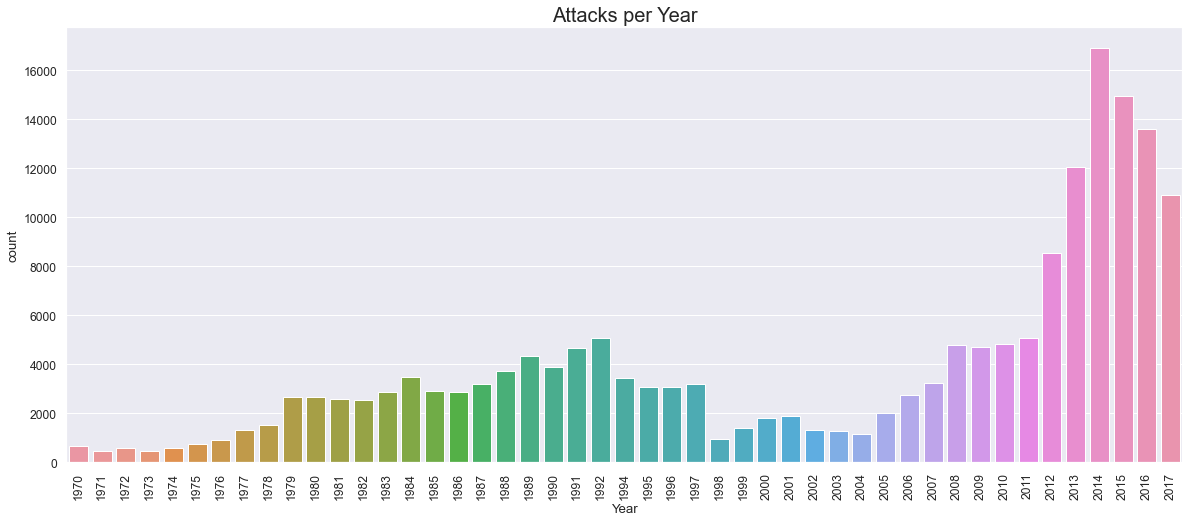

In [48]:
# Analysis of the number of attacks per year
plt.figure(figsize = (20,8))
sns.set(font_scale = 1.1)
plt.xticks(rotation = 90)
sns.countplot(x = 'Year' ,data = df)
plt.title('Attacks per Year',fontsize=20)

Text(0.5, 1.0, 'Number of Terrorist Attack by Region')

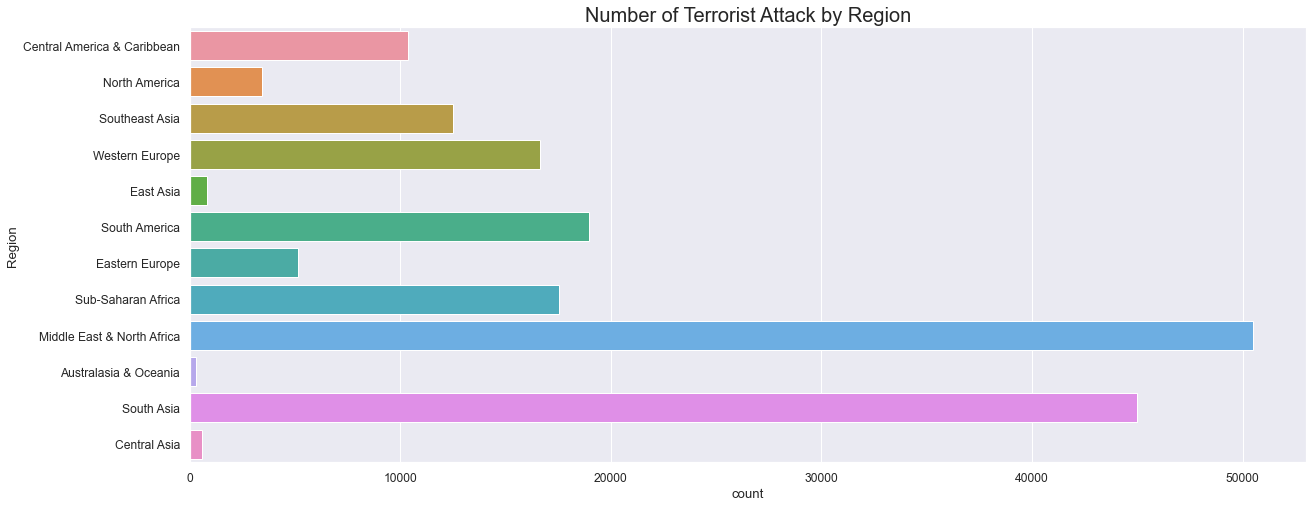

In [49]:
#Number of Attacks per Region (The globe has been divided into 12 distinct regions as per global standards)
plt.figure(figsize = (20,8))
sns.set(font_scale = 1.1)

sns.countplot(y = 'Region' ,data = df)
plt.title('Number of Terrorist Attack by Region',fontsize=20)

Text(0.5, 1.0, 'Types of Terrorist Attack')

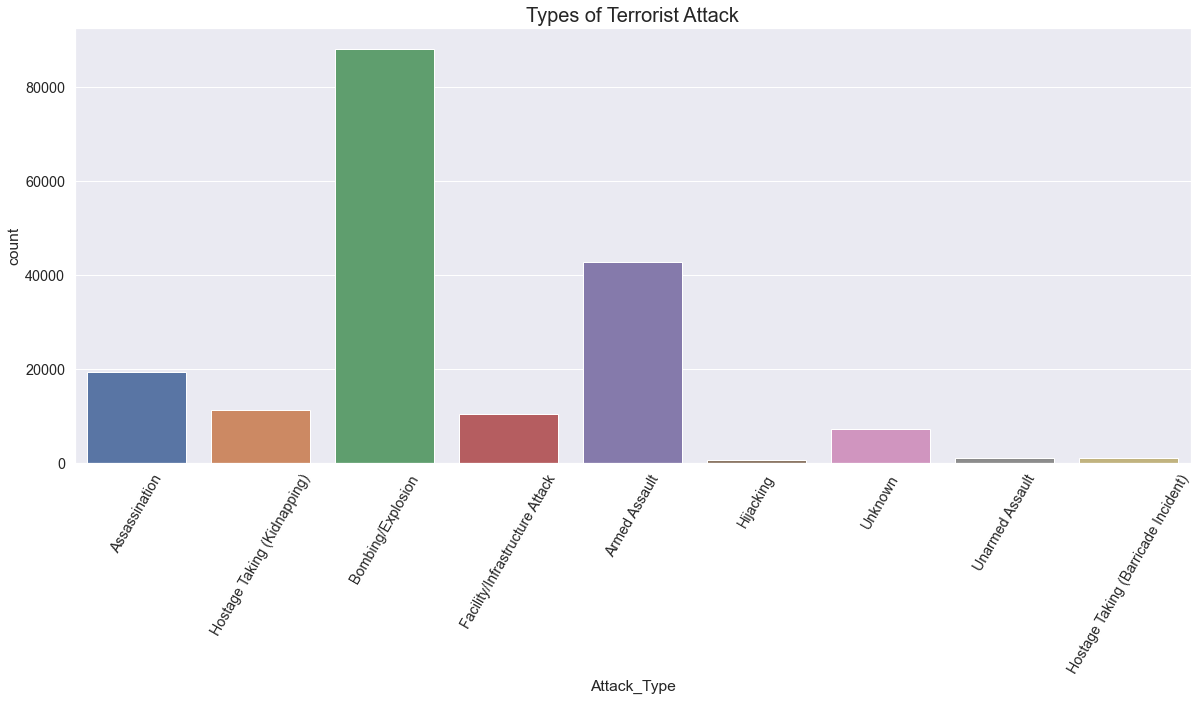

In [50]:
# Number of Attacks per Attack Method
plt.figure(figsize = (20,8))
sns.set(font_scale = 1.3)
plt.xticks(rotation = 60)

sns.countplot(x = 'Attack_Type' ,data = df)
plt.title('Types of Terrorist Attack',fontsize=20)

Text(0.5, 1.0, 'Types of Terrorist Attack')

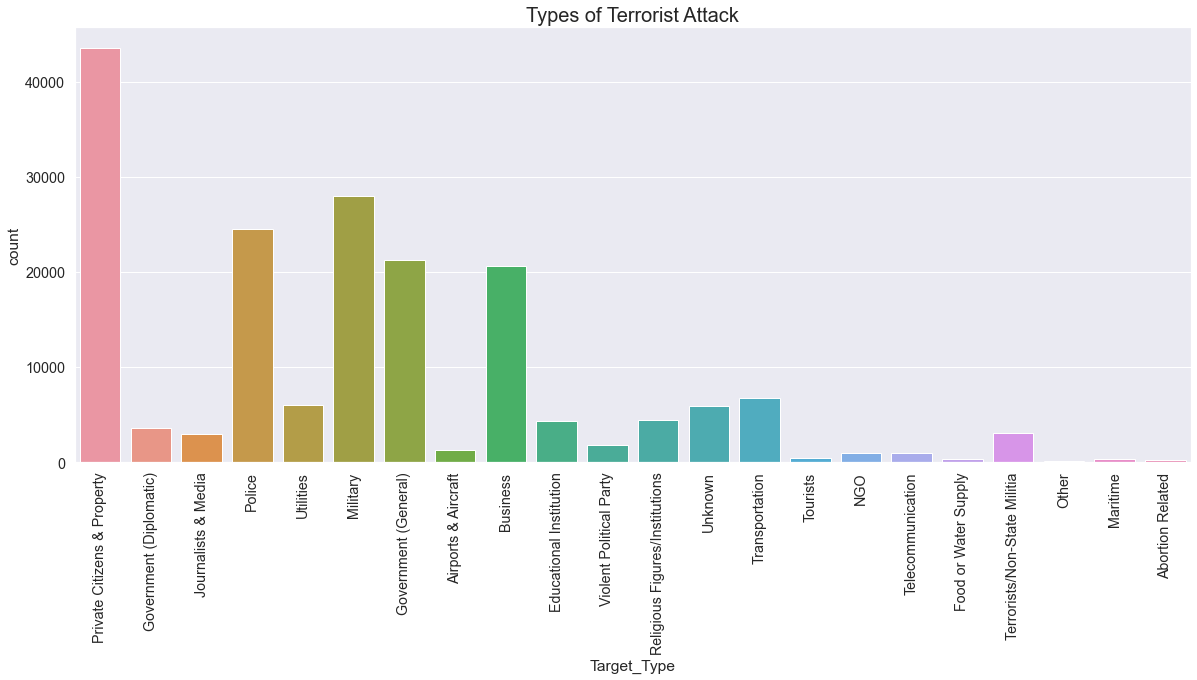

In [51]:
# Number of Attacks per Type of Targets
plt.figure(figsize = (20,8))
sns.set(font_scale = 1.3)
plt.xticks(rotation = 90)

sns.countplot(x = 'Target_Type' ,data = df)
plt.title('Types of Terrorist Attack',fontsize=20)

Text(0.5, 1.0, 'Types of Weapons')

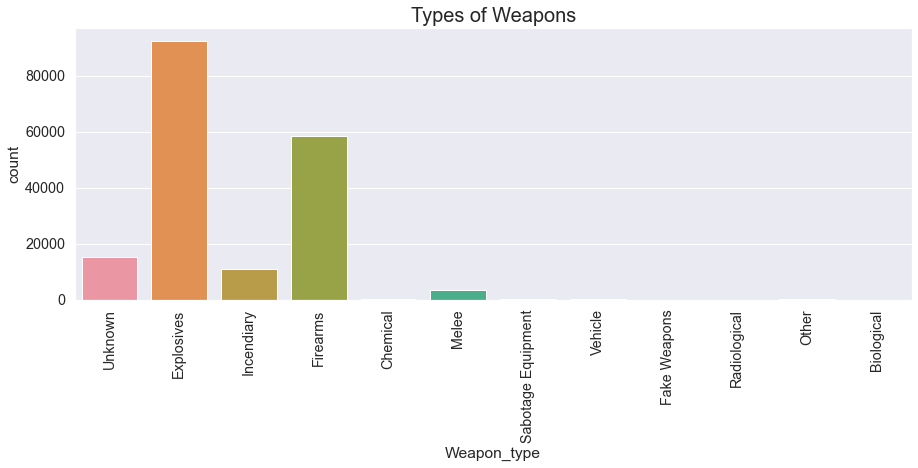

In [52]:
# Number of Weapons Type 
plt.figure(figsize = (15,5))
sns.set(font_scale = 1.3)
plt.xticks(rotation = 90)

sns.countplot(x = 'Weapon_type' ,data = df)
plt.title('Types of Weapons',fontsize=20)

## Output of Data Analysis

- Attacks were more during 2012 to 2017.Number of attacks are little bit consistent in 1979 to 2012.
- Iraq has the highest number of attacks.then comes Pakistan,Afghanistan and india which have almost same number of attacks.
- Baghdad is the most affected state in word by terrorism.
- The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.
- Most of the attacks were through Bombs and explosives.
- For most of the attacks, the target is Private Citizens & property and the next Military leads.
- Most of the times explosives and firearms are used as weapon.
- From 1970, 872892 Casualties happened with people all over the world and 10719 people kidnapped.